<a href="https://colab.research.google.com/github/jeremysb1/predictive-analytics/blob/main/causal_impact_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries, Dates, and Data

In [ ]:
#installing libraries
!pip install yfinance
!pip install tfcausalimpact


In [2]:
#Import Libraries
import yfinance as yf
import pandas as pd
from causalimpact import CausalImpact
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Define Dates
training_start = "2014-01-01"
training_end = "2015-08-26"
treatment_start = "2015-09-02"
treatment_end = "2015-09-30"
end_stock = "2015-10-01"

In [4]:
#Download Stock Data
y = ["VOW.DE"]
y = yf.download(y, start = training_start, end = end_stock, interval = "1wk")
y = y['Adj Close'].rename("y")
y

[*********************100%***********************]  1 of 1 completed


Date
2014-01-01    164.446136
2014-01-08    161.642365
2014-01-15    167.164948
2014-01-22    159.220886
2014-01-29    149.110306
                 ...    
2015-09-02    146.728653
2015-09-09    148.014984
2015-09-16     98.647087
2015-09-23     91.638878
2015-09-30     93.191330
Name: y, Length: 92, dtype: float64

In [8]:
#Load more stock data
stocks = ["FB", "DIS", "NVS", "CARL-B.CO"]
x = yf.download(tickers = stocks, start = training_start, end = end_stock, interval = "1wk")
x = x.iloc[:, :len(stocks)]
x.columns = x.columns.droplevel()
x.head()

[*********************100%***********************]  4 of 4 completed


,CARL-B.CO,DIS,FB,NVS
Date,,,,
2014-01-01,511.266571,70.256935,57.919998,51.769505
2014-01-08,492.046021,68.517548,57.740002,52.596825
2014-01-15,510.839417,68.287460,58.509998,53.007233
2014-01-22,474.961151,67.072639,55.139999,51.828140
2014-01-29,463.001648,65.388474,62.750000,50.942181


In [9]:
#Combine both data sets
df = pd.concat([y, x], axis = 1).dropna()

In [10]:
df.head()

,y,CARL-B.CO,DIS,FB,NVS
Date,,,,,
2014-01-01,164.446136,511.266571,70.256935,57.919998,51.769505
2014-01-08,161.642365,492.046021,68.517548,57.740002,52.596825
2014-01-15,167.164948,510.839417,68.287460,58.509998,53.007233
2014-01-22,159.220886,474.961151,67.072639,55.139999,51.828140
2014-01-29,149.110306,463.001648,65.388474,62.750000,50.942181


#Correlation Matrix

In [11]:
#subsetting training data
df_training = df[df.index <= training_end]
df_training.tail()

,y,CARL-B.CO,DIS,FB,NVS
Date,,,,,
2015-07-29,165.003204,524.887390,114.076355,94.059998,71.715416
2015-08-05,165.180634,523.124512,101.242882,93.620003,70.697548
2015-08-12,155.422379,520.039551,100.249191,95.169998,71.473061
2015-08-19,148.857742,437.890900,89.890541,83.000000,65.878189
2015-08-26,143.668121,435.951782,93.284065,87.230003,65.559677


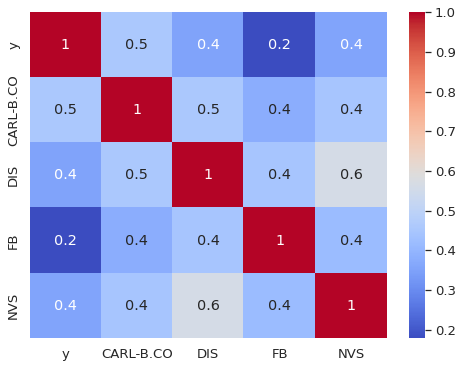

In [13]:
#Correlation
plt.figure(figsize = (8, 6))
sns.set(font_scale = 1.2)
sns.heatmap(data = df_training.pct_change().dropna().corr(), annot = True, fmt = '.1g', cmap = 'coolwarm')

In [15]:
#removing unwanted time series
df = df.drop(columns = ["FB"])
df.head(1)

,y,CARL-B.CO,DIS,NVS
Date,,,,
2014-01-01,164.446136,511.266571,70.256935,51.769505


#Causal Impact

In [16]:
#Define pre and post period
pre_period = [training_start, training_end]
post_period = [treatment_start, treatment_end]

In [ ]:
#Causal Impact
impact = CausalImpact(data = df, pre_period = pre_period, post_period = post_period)

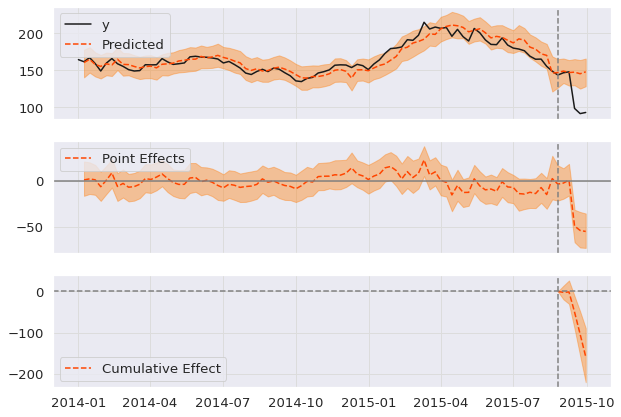

In [18]:
#Visualization
impact.plot()

In [19]:
#summary
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    115.64             578.22
Prediction (s.d.)         147.42 (6.45)      737.12 (32.26)
95% CI                    [134.02, 159.31]   [670.08, 796.54]

Absolute effect (s.d.)    -31.78 (6.45)      -158.9 (32.26)
95% CI                    [-43.66, -18.37]   [-218.32, -91.86]

Relative effect (s.d.)    -21.56% (4.38%)    -21.56% (4.38%)
95% CI                    [-29.62%, -12.46%] [-29.62%, -12.46%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))
